In this notebook:
- We will generate a synthetic data set
- Add some gaussian noise to the target feature
- Fit diferent regression models to this dataset and evaluate how they perform on the noisy data set. 

## Import necessary libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split
from sklearn.metrics import (mean_absolute_error,
                                mean_squared_error,
                                root_mean_squared_error,
                                max_error)

## Create a data set and add some noise to the target feature

In [2]:
# A synthetic data set with some Gaussian noise
df = pd.DataFrame()

a = np.linspace(0, 1, 5000)
intercept = 0.15
target_without_noise = intercept + a + a**2 + a**5

noise = np.random.normal(0, 0.02, len(a))
target_with_noise = target_without_noise + noise

df["a"] = a
df["a2"] = a**2
df["a3"] = a**3
df["a4"] = a**4
df["a5"] = a**5
df["target_without_noise"] = target_without_noise
df["target_with_noise"] = target_with_noise

In [3]:
df.head()

,a,a2,a3,a4,a5,target_without_noise,target_with_noise
0,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.150000,0.144976
1,0.0002,4.001600e-08,8.004802e-12,1.601281e-15,3.203202e-19,0.150200,0.158933
2,0.0004,1.600640e-07,6.403842e-11,2.562049e-14,1.025025e-17,0.150400,0.163979
3,0.0006,3.601440e-07,2.161297e-10,1.297037e-13,7.783781e-17,0.150600,0.115104
4,0.0008,6.402561e-07,5.123073e-10,4.099278e-13,3.280079e-16,0.150801,0.168859


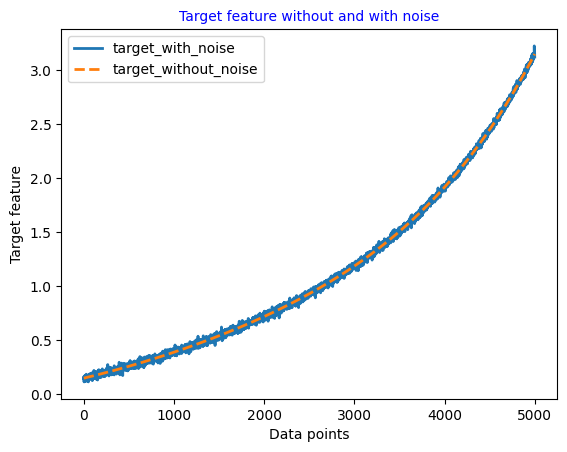

In [4]:
# Plot the target feature without and with noise 
plt.plot(df.target_with_noise, "-", lw=2, label="target_with_noise")
plt.plot(df.target_without_noise, "--", lw=2, label="target_without_noise")
plt.xlabel("Data points")
plt.ylabel("Target feature")
plt.title("Target feature without and with noise", c="blue", fontsize=10)
plt.legend()
plt.show();

## Fit a model using the data set we just created

#### First, we use target feature without noise to fit a `LinearRegression` model

In [5]:
# Split the data in to training and testing set
# Here, we are using the target feature without noise 
X_train_without_noise, X_test_without_noise, \
    y_train_without_noise, y_test_without_noise = train_test_split(df[df.columns[:-2]],
                                                    df[df.columns[-2]],
                                                    test_size=0.25)

In [6]:
## Fit a model
model = LinearRegression().fit(X_train_without_noise, y_train_without_noise)

In [7]:
# Use the fitted model to predict on the test data 
y_pred = model.predict(X_test_without_noise)

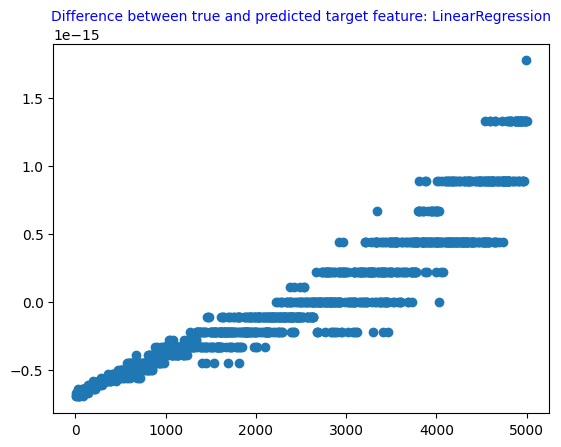

In [8]:
# Plot the difference between true and model predicted target feature
plt.plot(y_test_without_noise - y_pred, "o")
plt.title("Difference between true and predicted target feature: LinearRegression", c="blue", fontsize=10)
plt.show();

In [9]:
# Print prediction error of our model
print("Coefficient of determination =", model.score(X_test_without_noise, y_test_without_noise))
print("Mean absolute error =", mean_absolute_error(y_test_without_noise, y_pred))
print("Mean squared error =", mean_squared_error(y_test_without_noise, y_pred))
print("Root mean squared error =", root_mean_squared_error(y_test_without_noise, y_pred))
print("Maximum error =", max_error(y_test_without_noise, y_pred))

Coefficient of determination = 1.0
Mean absolute error = 3.9057646006313005e-16
Mean squared error = 2.415652329158111e-31
Root mean squared error = 4.914928615105322e-16
Maximum error = 1.7763568394002505e-15


In [10]:
# Print intercept 
print("True intercept =", intercept)
print("Intercept of the fitted model =", model.intercept_)

True intercept = 0.15
Intercept of the fitted model = 0.1500000000000007


In [11]:
# Model coefficients associted with the input features
# Ideally, third and fourth coefficients should be zero and rest of them should be one
print("Coefficient =", model.coef_)

Coefficient = [ 1.00000000e+00  1.00000000e+00 -2.44249065e-15  6.66133815e-16
  1.00000000e+00]


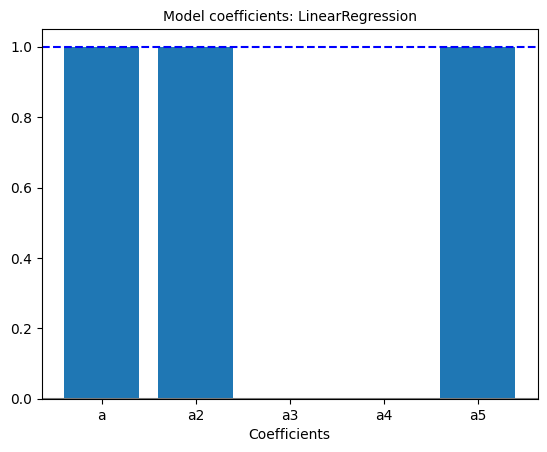

In [12]:
# Bar plot of the model coefficients
plt.axhline(0, c="gray")
plt.axhline(1, c="blue", linestyle="--")
plt.bar(df.columns[:-2], model.coef_)
plt.xlabel("Coefficients")
plt.title("Model coefficients: LinearRegression", fontsize=10)
plt.show();

#### Now, we use target feature with noise to fit a `LinearRegression` model

In [13]:
# Split the data in to training and testing set
# Here, we are using the target feature with noise 
X_train_with_noise, X_test_with_noise,\
    y_train_with_noise, y_test_with_noise = train_test_split(df[df.columns[:-2]],
                                                    df[df.columns[-1]],
                                                    test_size=0.25)

In [14]:
## Fit a model
model = LinearRegression().fit(X_train_with_noise, y_train_with_noise)

In [15]:
# Use the fitted model to predict on the test data 
y_pred = model.predict(X_test_with_noise)

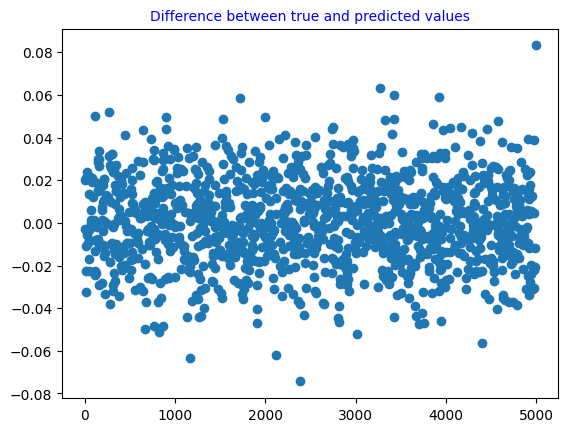

In [16]:
# Plot the difference between true and model predicted target feature
plt.plot(y_test_with_noise - y_pred, "o")
plt.title("Difference between true and predicted values", c="blue", fontsize=10)
plt.show();

In [17]:
# Print prediction error of our model
print("Coefficient of determination =", model.score(X_test_with_noise, y_test_with_noise))
print("Mean absolute error =", mean_absolute_error(y_test_with_noise, y_pred))
print("Mean squared error =", mean_squared_error(y_test_with_noise, y_pred))
print("Root mean squared error =", root_mean_squared_error(y_test_with_noise, y_pred))
print("Maximum error =", max_error(y_test_with_noise, y_pred))

Coefficient of determination = 0.9994125152055758
Mean absolute error = 0.01580245068478391
Mean squared error = 0.0003974046525591298
Root mean squared error = 0.01993501072382781
Maximum error = 0.08318457217040454


In [18]:
# Print intercept 
print("True intercept =", intercept)
print("Intercept of the fitted model =", model.intercept_)

True intercept = 0.15
Intercept of the fitted model = 0.1477732827672481


In [19]:
# Model coefficients associted with the input features
# Ideally, third and fourth coefficients should be zero and rest of them should be one
print("Coefficient =", model.coef_)

Coefficient = [ 1.03976491  0.77006309  0.56086536 -0.60576713  1.2373033 ]


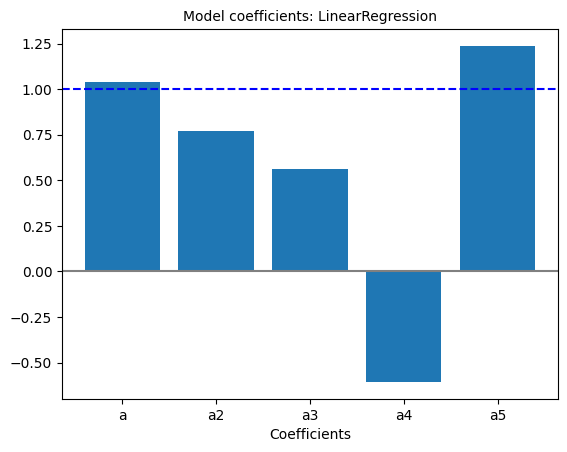

In [20]:
# Bar plot of the model coefficients
plt.axhline(0, c="gray")
plt.axhline(1, c="blue", linestyle="--")
plt.bar(df.columns[:-2], model.coef_)
plt.xlabel("Coefficients")
plt.title("Model coefficients: LinearRegression", fontsize=10)
plt.show();

Important points to note:
- When we used `target feature without noise` to train and test our model, the `model performed extremely well` in predicting target feature and the coefficients associated with input features.
- When we used `target feature with noise` to train and test our model, the `model performed really bad` in predicting the coefficients.

## Now, we will explore other regression methods using noisy target feature

#### Lasso

In [21]:
## Fit a model
model = Lasso(alpha=0.001).fit(X_train_with_noise, y_train_with_noise)

In [22]:
# Use the fitted model to predict on the test data 
y_pred = model.predict(X_test_with_noise)

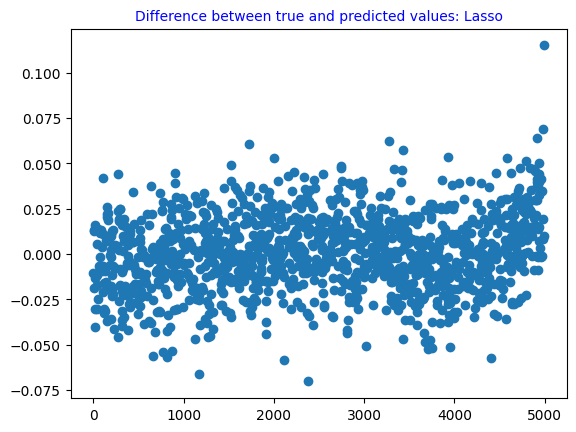

In [23]:
# Plot the difference between true and model predicted target feature
plt.plot(y_test_with_noise - y_pred, "o")
plt.title("Difference between true and predicted values: Lasso", c="blue", fontsize=10)
plt.show();

In [24]:
# Print prediction error of our model
print("Coefficient of determination =", model.score(X_test_with_noise, y_test_with_noise))
print("Mean absolute error =", mean_absolute_error(y_test_with_noise, y_pred))
print("Mean squared error =", mean_squared_error(y_test_with_noise, y_pred))
print("Root mean squared error =", root_mean_squared_error(y_test_with_noise, y_pred))
print("Maximum error =", max_error(y_test_with_noise, y_pred))

Coefficient of determination = 0.9993444907196131
Mean absolute error = 0.01665562963447208
Mean squared error = 0.00044341988132102166
Root mean squared error = 0.021057537399254967
Maximum error = 0.11495841385426209


In [25]:
# Print intercept 
print("True intercept =", intercept)
print("Intercept of the fitted model =", model.intercept_)

True intercept = 0.15
Intercept of the fitted model = 0.15549725230502753


In [26]:
# Model coefficients associted with the input features
# Ideally, third and fourth coefficients should be zero and rest of them should be one
print("Coefficient =", model.coef_)

Coefficient = [1.04292383 0.67318815 0.30760325 0.4473921  0.49115783]


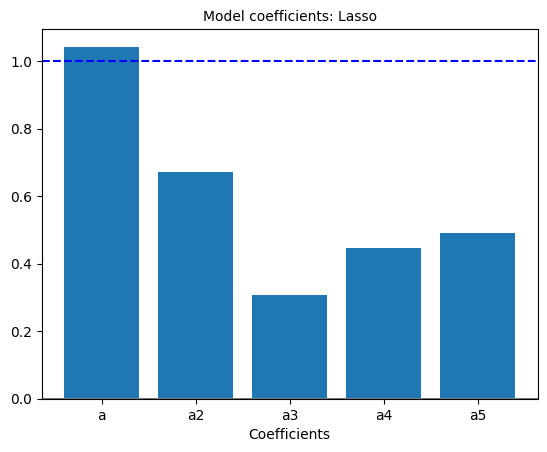

In [27]:
# Bar plot of the model coefficients
plt.axhline(0, c="gray")
plt.axhline(1, c="blue", linestyle="--")
plt.bar(df.columns[:-2], model.coef_)
plt.xlabel("Coefficients")
plt.title("Model coefficients: Lasso", fontsize=10)
plt.show();

#### LassoCV

In [28]:
## Fit a model
model = LassoCV(cv=100).fit(X_train_with_noise, y_train_with_noise)

In [29]:
# Use the fitted model to predict on the test data 
y_pred = model.predict(X_test_with_noise)

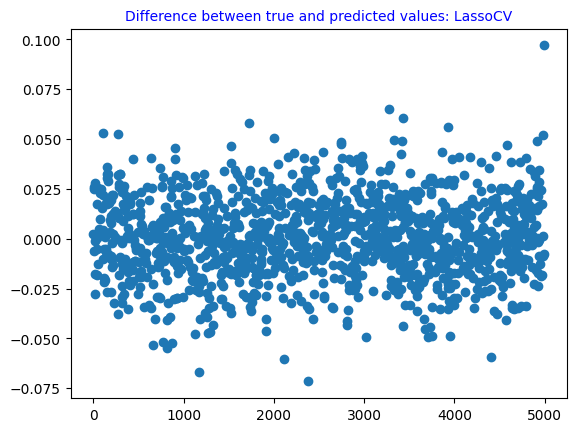

In [30]:
# Plot the difference between true and model predicted target feature
plt.plot(y_test_with_noise - y_pred, "o")
plt.title("Difference between true and predicted values: LassoCV", c="blue", fontsize=10)
plt.show();

In [31]:
# Print prediction error of our model
print("Coefficient of determination =", model.score(X_test_with_noise, y_test_with_noise))
print("Mean absolute error =", mean_absolute_error(y_test_with_noise, y_pred))
print("Mean squared error =", mean_squared_error(y_test_with_noise, y_pred))
print("Root mean squared error =", root_mean_squared_error(y_test_with_noise, y_pred))
print("Maximum error =", max_error(y_test_with_noise, y_pred))

Coefficient of determination = 0.9993936838207659
Mean absolute error = 0.016027368754960532
Mean squared error = 0.00041014316087230026
Root mean squared error = 0.020251991528546034
Maximum error = 0.09698662927937773


In [32]:
# Print intercept 
print("True intercept =", intercept)
print("Intercept of the fitted model =", model.intercept_)

True intercept = 0.15
Intercept of the fitted model = 0.14280684179213032


In [33]:
# Model coefficients associted with the input features
# Ideally, third and fourth coefficients should be zero and rest of them should be one
print("Coefficient =", model.coef_)

Coefficient = [1.13424639 0.53265209 0.31316454 0.44991317 0.56314758]


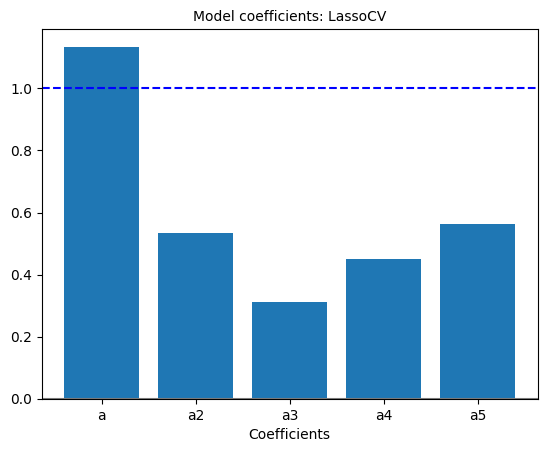

In [34]:
# Bar plot of the model coefficients
plt.axhline(0, c="gray")
plt.axhline(1, c="blue", linestyle="--")
plt.bar(df.columns[:-2], model.coef_)
plt.xlabel("Coefficients")
plt.title("Model coefficients: LassoCV", fontsize=10)
plt.show();

#### ElasticNet

In [35]:
## Fit a model
model = ElasticNet(alpha=0.001).fit(X_train_with_noise, y_train_with_noise)

In [36]:
# Use the fitted model to predict on the test data 
y_pred = model.predict(X_test_with_noise)

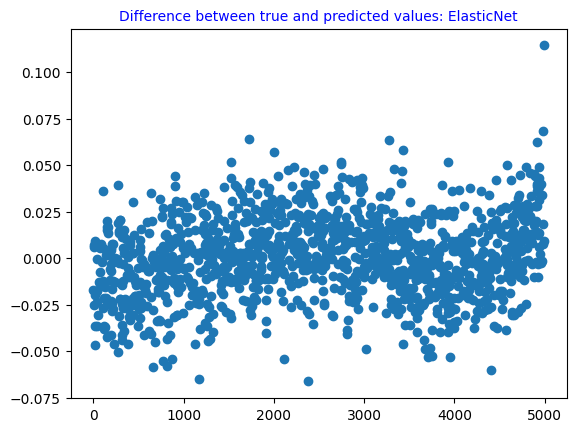

In [37]:
# Plot the difference between true and model predicted target feature
plt.plot(y_test_with_noise - y_pred, "o")
plt.title("Difference between true and predicted values: ElasticNet", c="blue", fontsize=10)
plt.show();

In [38]:
# Print prediction error of our model
print("Coefficient of determination =", model.score(X_test_with_noise, y_test_with_noise))
print("Mean absolute error =", mean_absolute_error(y_test_with_noise, y_pred))
print("Mean squared error =", mean_squared_error(y_test_with_noise, y_pred))
print("Root mean squared error =", root_mean_squared_error(y_test_with_noise, y_pred))
print("Maximum error =", max_error(y_test_with_noise, y_pred))

Coefficient of determination = 0.9993149242565055
Mean absolute error = 0.017070304569639583
Mean squared error = 0.0004634201436430555
Root mean squared error = 0.021527195443044954
Maximum error = 0.11427639631292807


In [39]:
# Print intercept 
print("True intercept =", intercept)
print("Intercept of the fitted model =", model.intercept_)

True intercept = 0.15
Intercept of the fitted model = 0.16214003574010272


In [40]:
# Model coefficients associted with the input features
# Ideally, third and fourth coefficients should be zero and rest of them should be one
print("Coefficient =", model.coef_)

Coefficient = [1.01309033 0.63299221 0.44982925 0.42225104 0.4380924 ]


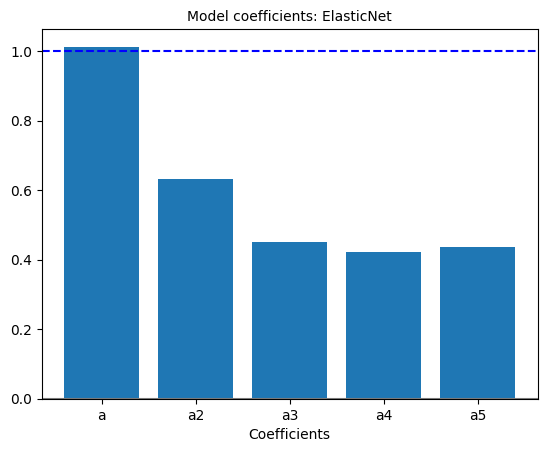

In [41]:
# Bar plot of the model coefficients
plt.axhline(0, c="gray")
plt.axhline(1, c="blue", linestyle="--")
plt.bar(df.columns[:-2], model.coef_)
plt.xlabel("Coefficients")
plt.title("Model coefficients: ElasticNet", fontsize=10)
plt.show();

#### Ridge

In [91]:
## Fit a model
model = Ridge(alpha=0.003).fit(X_train_with_noise, y_train_with_noise)

In [92]:
# Use the fitted model to predict on the test data 
y_pred = model.predict(X_test_with_noise)

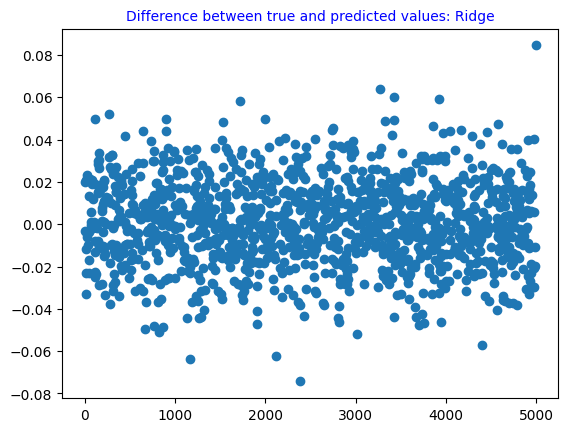

In [93]:
# Plot the difference between true and model predicted target feature
plt.plot(y_test_with_noise - y_pred, "o")
plt.title("Difference between true and predicted values: Ridge", c="blue", fontsize=10)
plt.show();

In [94]:
# Print prediction error of our model
print("Coefficient of determination =", model.score(X_test_with_noise, y_test_with_noise))
print("Mean absolute error =", mean_absolute_error(y_test_with_noise, y_pred))
print("Mean squared error =", mean_squared_error(y_test_with_noise, y_pred))
print("Root mean squared error =", root_mean_squared_error(y_test_with_noise, y_pred))
print("Maximum error =", max_error(y_test_with_noise, y_pred))

Coefficient of determination = 0.9994120816819128
Mean absolute error = 0.015814105505488226
Mean squared error = 0.0003976979100567915
Root mean squared error = 0.01994236470574118
Maximum error = 0.08446751759793658


In [95]:
# Print intercept 
print("True intercept =", intercept)
print("Intercept of the fitted model =", model.intercept_)

True intercept = 0.15
Intercept of the fitted model = 0.1482961877888357


In [96]:
# Model coefficients associted with the input features
# Ideally, third and fourth coefficients should be zero and rest of them should be one
print("Coefficient =", model.coef_)

Coefficient = [ 1.01871156  0.94194725  0.05746491 -0.00263677  0.98489999]


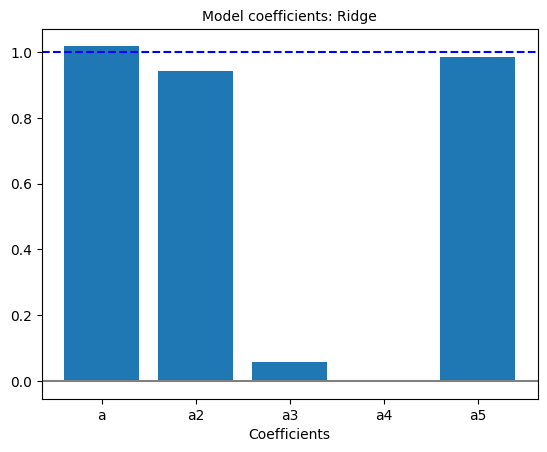

In [97]:
# Bar plot of the model coefficients
plt.axhline(0, c="gray")
plt.axhline(1, c="blue", linestyle="--")
plt.bar(df.columns[:-2], model.coef_)
plt.xlabel("Coefficients")
plt.title("Model coefficients: Ridge", fontsize=10)
plt.show();

#### BayesianRidge

In [175]:
## Fit a model
model = BayesianRidge(max_iter=1000).fit(X_train_with_noise, y_train_with_noise)

In [176]:
# Use the fitted model to predict on the test data 
y_pred = model.predict(X_test_with_noise)

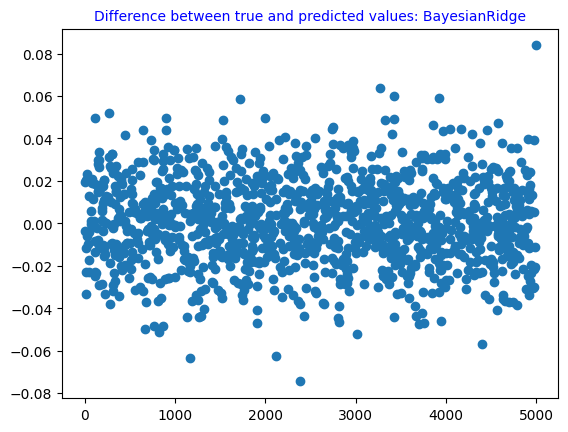

In [177]:
# Plot the difference between true and model predicted target feature
plt.plot(y_test_with_noise - y_pred, "o")
plt.title("Difference between true and predicted values: BayesianRidge", c="blue", fontsize=10)
plt.show();

In [178]:
# Print prediction error of our model
print("Coefficient of determination =", model.score(X_test_with_noise, y_test_with_noise))
print("Mean absolute error =", mean_absolute_error(y_test_with_noise, y_pred))
print("Mean squared error =", mean_squared_error(y_test_with_noise, y_pred))
print("Root mean squared error =", root_mean_squared_error(y_test_with_noise, y_pred))
print("Maximum error =", max_error(y_test_with_noise, y_pred))

Coefficient of determination = 0.9994124093939483
Mean absolute error = 0.01580772729250085
Mean squared error = 0.00039747622893611476
Root mean squared error = 0.019936805886001767
Maximum error = 0.08379355963609036


In [179]:
# Print intercept 
print("True intercept =", intercept)
print("Intercept of the fitted model =", model.intercept_)

True intercept = 0.15
Intercept of the fitted model = 0.14836371756845612


In [180]:
# Model coefficients associted with the input features
# Ideally, third and fourth coefficients should be zero and rest of them should be one
print("Coefficient =", model.coef_)

Coefficient = [ 1.02167387  0.89838961  0.21588305 -0.21565807  1.08072294]


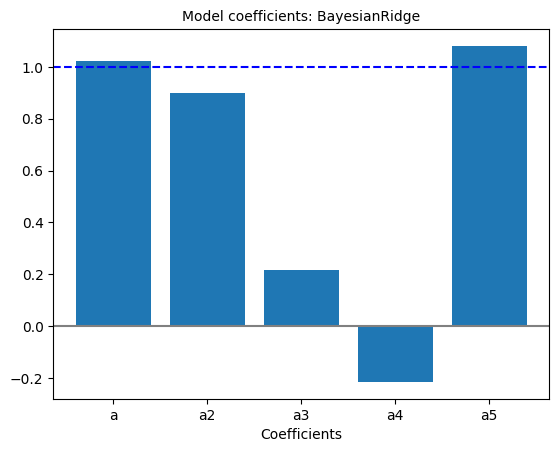

In [181]:
# Bar plot of the model coefficients
plt.axhline(0, c="gray")
plt.axhline(1, c="blue", linestyle="--")
plt.bar(df.columns[:-2], model.coef_)
plt.xlabel("Coefficients")
plt.title("Model coefficients: BayesianRidge", fontsize=10)
plt.show();